In [1]:
import datetime
import time as time_module
import sys
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import theano
import matplotlib
import pymc3 as pm

try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append('../..')
    import covid19_inference as cov19

path_to_save = '../../figures/'


INFO: This code is not longer developed, use our new module instead: github.com/Priesemann-Group/covid19_inference


In [2]:

confirmed_cases = cov19.get_jhu_confirmed_cases()

country = 'Germany'
date_data_begin = datetime.datetime(2020,3,1)
date_data_end   = cov19.get_last_date(confirmed_cases)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 28
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days


cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

print('Cases yesterday ({}): {} and '
      'day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))

prior_date_mild_dist_begin =  datetime.datetime(2020,3,9)
prior_date_strong_dist_begin =  datetime.datetime(2020,3,16)
prior_date_contact_ban_begin =  datetime.datetime(2020,3,23)


traces = []
models = []
num_change_points = 3
for fact_larger in [1,2,4]:
    change_points = [dict(pr_mean_date_begin_transient = prior_date_mild_dist_begin,
                          pr_sigma_date_begin_transient = 3*fact_larger,
                          pr_median_lambda = 0.2,
                          pr_sigma_lambda = 0.5,
                          pr_sigma_transient_len = 0.3*fact_larger),
                     dict(pr_mean_date_begin_transient = prior_date_strong_dist_begin,
                          pr_sigma_date_begin_transient = 1*fact_larger,
                          pr_median_lambda = 1/8,
                          pr_sigma_lambda = 0.5,
                          pr_sigma_transient_len = 0.3*fact_larger),
                     dict(pr_mean_date_begin_transient = prior_date_contact_ban_begin,
                          pr_sigma_date_begin_transient = 1*fact_larger,
                          pr_median_lambda = 1/8/2,
                          pr_sigma_lambda = 0.5,
                          pr_sigma_transient_len = 0.3*fact_larger)]

    dict_priors = dict(pr_sigma_delay = 0.2*fact_larger)
    model = cov19.SIR_with_change_points(new_cases_obs = np.diff(cases_obs),
                                         change_points_list = change_points[:num_change_points],
                                         date_begin_simulation = date_begin_sim,
                                         num_days_sim = num_days_sim,
                                         diff_data_sim = diff_data_sim,
                                         N = 83e6,
                                         priors_dict=dict_priors)
    models.append(model)
    traces.append(pm.sample(model=model, init='advi+adapt_diag', draws=4000, tune=3000))

Cases yesterday (2020-04-24T00:00:00): 154999 and day before yesterday: 153129
pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_median_transient_len of change point 1 was set to default value 3
pr_median_transient_len of change point 2 was set to default value 3


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 510.27:   8%|▊         | 15698/200000 [00:27<05:23, 569.86it/s]
Convergence achieved at 15700
Interrupted at 15,699 [7%]: Average Loss = 654.16
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 28000/28000 [22:57<00:00, 20.32draws/s]


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_median_transient_len of change point 1 was set to default value 3
pr_median_transient_len of change point 2 was set to default value 3


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 497.68:  10%|▉         | 19444/200000 [00:34<05:24, 555.66it/s]
Convergence achieved at 19500
Interrupted at 19,499 [9%]: Average Loss = 624.87
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 28000/28000 [25:31<00:00, 18.29draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_median_transient_len of change point 1 was set to default value 3
pr_median_transient_len of change point 2 was set to default value 3


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
Average Loss = 514.68:   8%|▊         | 15844/200000 [00:27<05:17, 580.36it/s]
Convergence achieved at 15900
Interrupted at 15,899 [7%]: Average Loss = 661.48
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 17 divergences:  72%|███████▏  | 20108/28000 [45:38<17:54,  7.34draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.


In [3]:
exec(open('figures_revised.py').read())

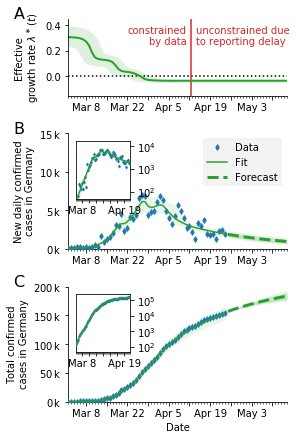

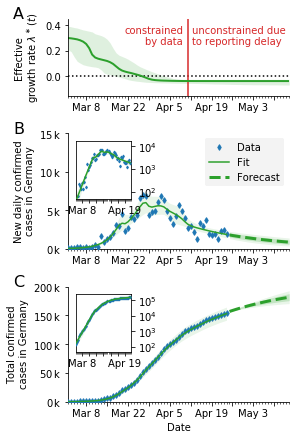

In [7]:
create_figure_timeserie(traces[1], 'tab:green', num_days_fut_to_plot=21,
                       plot_red_axis=True, save_to=path_to_save + 'Fig_SIR_2_times_larger_priors_cases',
                       )
create_figure_timeserie(traces[2], 'tab:green', num_days_fut_to_plot=21,
                       plot_red_axis=True, save_to=path_to_save + 'Fig_SIR_4_times_larger_priors_cases',
                       )

/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1553: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.WeekdayLocator'>
/scratch.local/jdehning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1553: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.WeekdayLocator'>


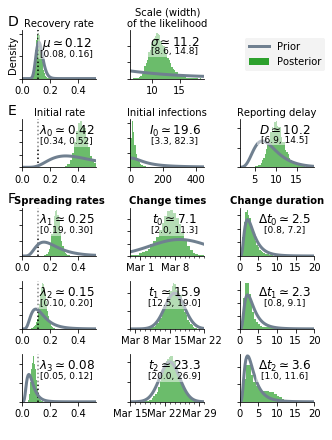

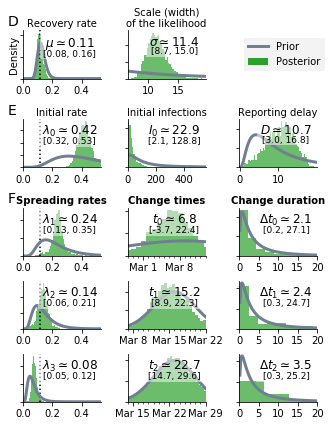

In [11]:
#create_figure_3_distributions(models[1], traces[1], layout=2,
#                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:red',
#                              num_changepoints=1, xlim_tbegin=7, save_to = path_to_save +'Fig_S2')
create_figure_distributions(models[1], traces[1],
                            additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:green',
                            num_changepoints=3, save_to = path_to_save + 'Fig_SIR_2_times_larger_priors_distr',
                            xlim_tbegin=8,
                            xlim_transt=(0,20))
create_figure_distributions(models[2], traces[2],
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:green',
                              num_changepoints=3, save_to = path_to_save + 'Fig_SIR_4_times_larger_priors_distr',
                            xlim_tbegin=8,
                            xlim_transt=(0,20))


In [9]:
print('\noriginal model\n')
print(pm.loo(traces[0], model))

print('\n2 times larger priors\n')
print(pm.loo(traces[1], model))

print('\n4 times larger priors\n')
print(pm.loo(traces[2], model))



original model

Computed from 16000 by 54 log-likelihood matrix

       Estimate       SE
IC_loo   850.53    17.43
p_loo      9.00        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       54  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


2 times larger priors

Computed from 16000 by 54 log-likelihood matrix

       Estimate       SE
IC_loo   856.06    17.42
p_loo     13.72        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       54  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


4 times larger priors

Computed from 4802 by 54 log-likelihood matrix

       Estimate       SE
IC_loo   857.56    17.12
p_loo     13.97        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       54  100.0

In [ ]:
for i in range(4):
    print('λ_{}*: '.format(i))
    print(print_median_CI(trace['lambda_{}'.format(i)] - trace.mu, prec=3))
    print('\n')